In [2]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import warnings for ignore warning
import warnings as warning
warning.filterwarnings('ignore')

In [6]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/vishalkrishna90/BANK-NOTE-AUTHENTICATION-PREDICTION/main/BankNote_Authentication.csv')

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.shape

(1372, 5)

# Data Preprocessing

In [12]:
# check datatype
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [8]:
# check null values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
# check duplicate values
df.duplicated().sum()

24

In [10]:
# drop duplicate values
df.drop_duplicates(keep = 'first', inplace = True)

# Check & Handel Outliers

In [13]:
# check outliers by describe method
df.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**We Can See In Curtosis And Entropy Columns Has Some Big And Small Values, For More Clarification We Will Use Box Plot To See Data**

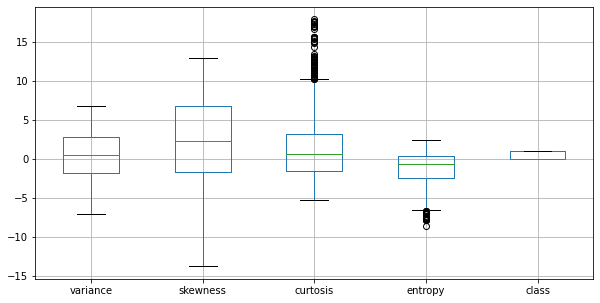

In [17]:
plt.figure(figsize = (10,5))
df.boxplot()
plt.show()

**Based On Data Curtossis And Entropy Column Has Some Amount Of Outliers, For More Clarification We Will Use IQR Method**

In [23]:
# for curtosis columns
q1 = df['curtosis'].quantile(0.25)
q3 = df['curtosis'].quantile(0.75)
iqr = q3-q1
lo = q1 - 1.5 * iqr
hi = q3 + 1.5 * iqr
print('Lower And Upper Limit Of Curtosis Data:', lo,hi)

# for entropy columns
q1 = df['entropy'].quantile(0.25)
q3 = df['entropy'].quantile(0.75)
iqr = q3-q1
lo = q1 - 1.5 * iqr
hi = q3 + 1.5 * iqr
print('Lower And Upper Limit Of entropy Data:', lo,hi)

Lower And Upper Limit Of Curtosis Data: -8.6637 10.3179
Lower And Upper Limit Of entropy Data: -6.588543750000001 4.599306250000001


**Check How Many Data Is Higher And Lower Then Upper Limit And Lower Limit** 

In [31]:
df[(df['curtosis']>10.3179) | (df['curtosis']<-8.66)].shape

(59, 5)

In [32]:
df[(df['entropy']>4.5993) | (df['entropy']<-6.5885)].shape

(32, 5)

In [36]:
df[(df['curtosis']>10.3179) | (df['entropy']<-6.5885)]

,variance,skewness,curtosis,entropy,class
41,-0.20620,9.2207,-3.70440,-6.81030,0
45,-0.78690,9.5663,-3.78670,-7.50340,0
59,-0.78289,11.3603,-0.37644,-7.04950,0
194,-2.34100,12.3784,0.70403,-7.58360,0
202,-0.78689,9.5663,-3.78670,-7.50340,0
...,...,...,...,...,...
1329,-2.96720,-13.2869,13.47270,-2.62710,1
1364,-2.83910,-6.6300,10.48490,-0.42113,1
1365,-4.50460,-5.8126,10.88670,-0.52846,1
1369,-3.75030,-13.4586,17.59320,-2.77710,1


In [37]:
dfs = df.copy()

In [47]:
# remove outliers
dfs = df[(df['curtosis']<=10.3179) & (df['entropy']>=-6.5885)]

In [52]:
dfs.shape

(1257, 5)

In [110]:
# dfs.to_csv('Clean_BankNote_Authentication.csv', index = False)

**Now Our Dataframe Is Pretty Clean**

# Exploratory Data Analysis

**Feature Correlation**

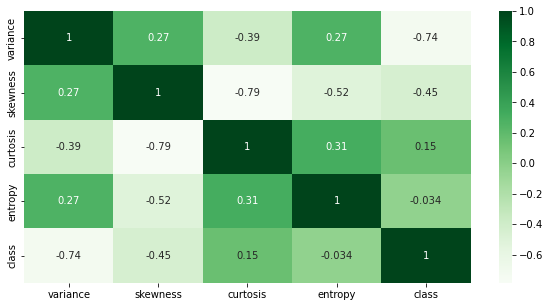

In [56]:
# feature correlation
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

**Feature Distribution**

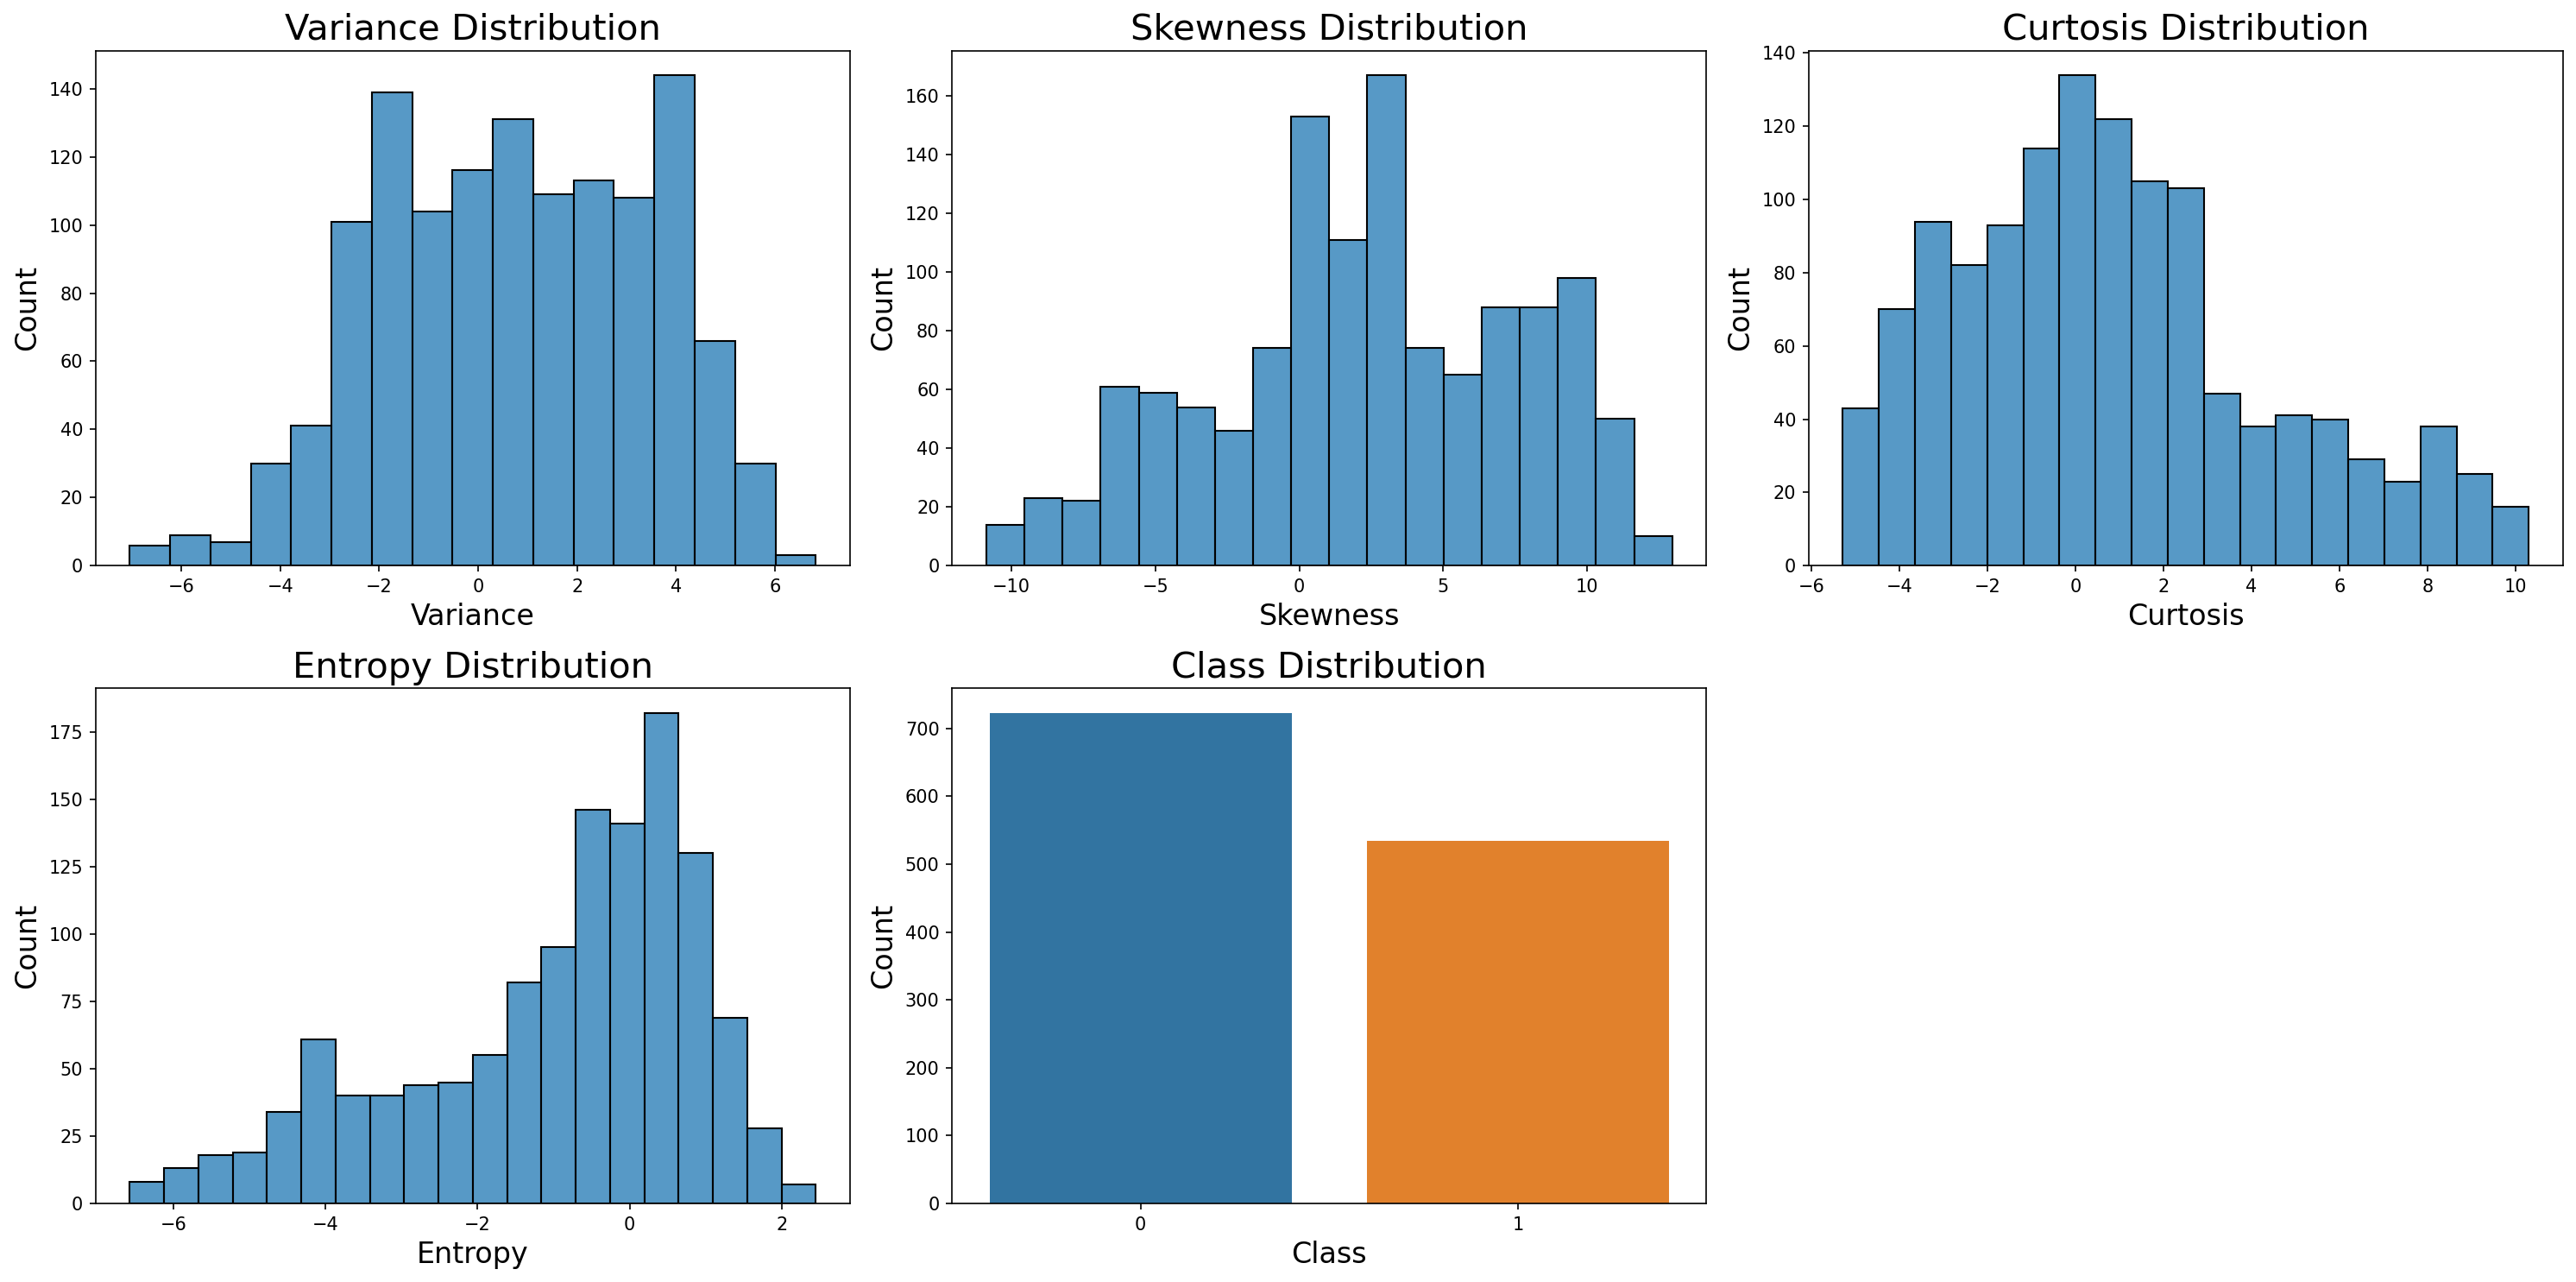

In [69]:
# feature distribution
plt.figure(figsize = (20,10),dpi=150)  

# variance
plt.subplot(2,3,1) 
sns.histplot(dfs.variance) 
plt.title('Variance Distribution', fontsize = 20) 
plt.xlabel('Variance',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

# skewness
plt.subplot(2,3,2) 
sns.histplot(dfs.skewness) 
plt.title('Skewness Distribution', fontsize = 20) 
plt.xlabel('Skewness',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# curtosis
plt.subplot(2,3,3) 
sns.histplot(dfs.curtosis) 
plt.title('Curtosis Distribution', fontsize = 20) 
plt.xlabel('Curtosis',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# entropy
plt.subplot(2,3,4) 
sns.histplot(dfs.entropy) 
plt.title('Entropy Distribution', fontsize = 20) 
plt.xlabel('Entropy',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# class
plt.subplot(2,3,5) 
sns.countplot(dfs['class']) 
plt.title('Class Distribution', fontsize = 20) 
plt.xlabel('Class',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

plt.tight_layout()
plt.show()

In [67]:
dfs.head(2)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


**Features Vs Target**

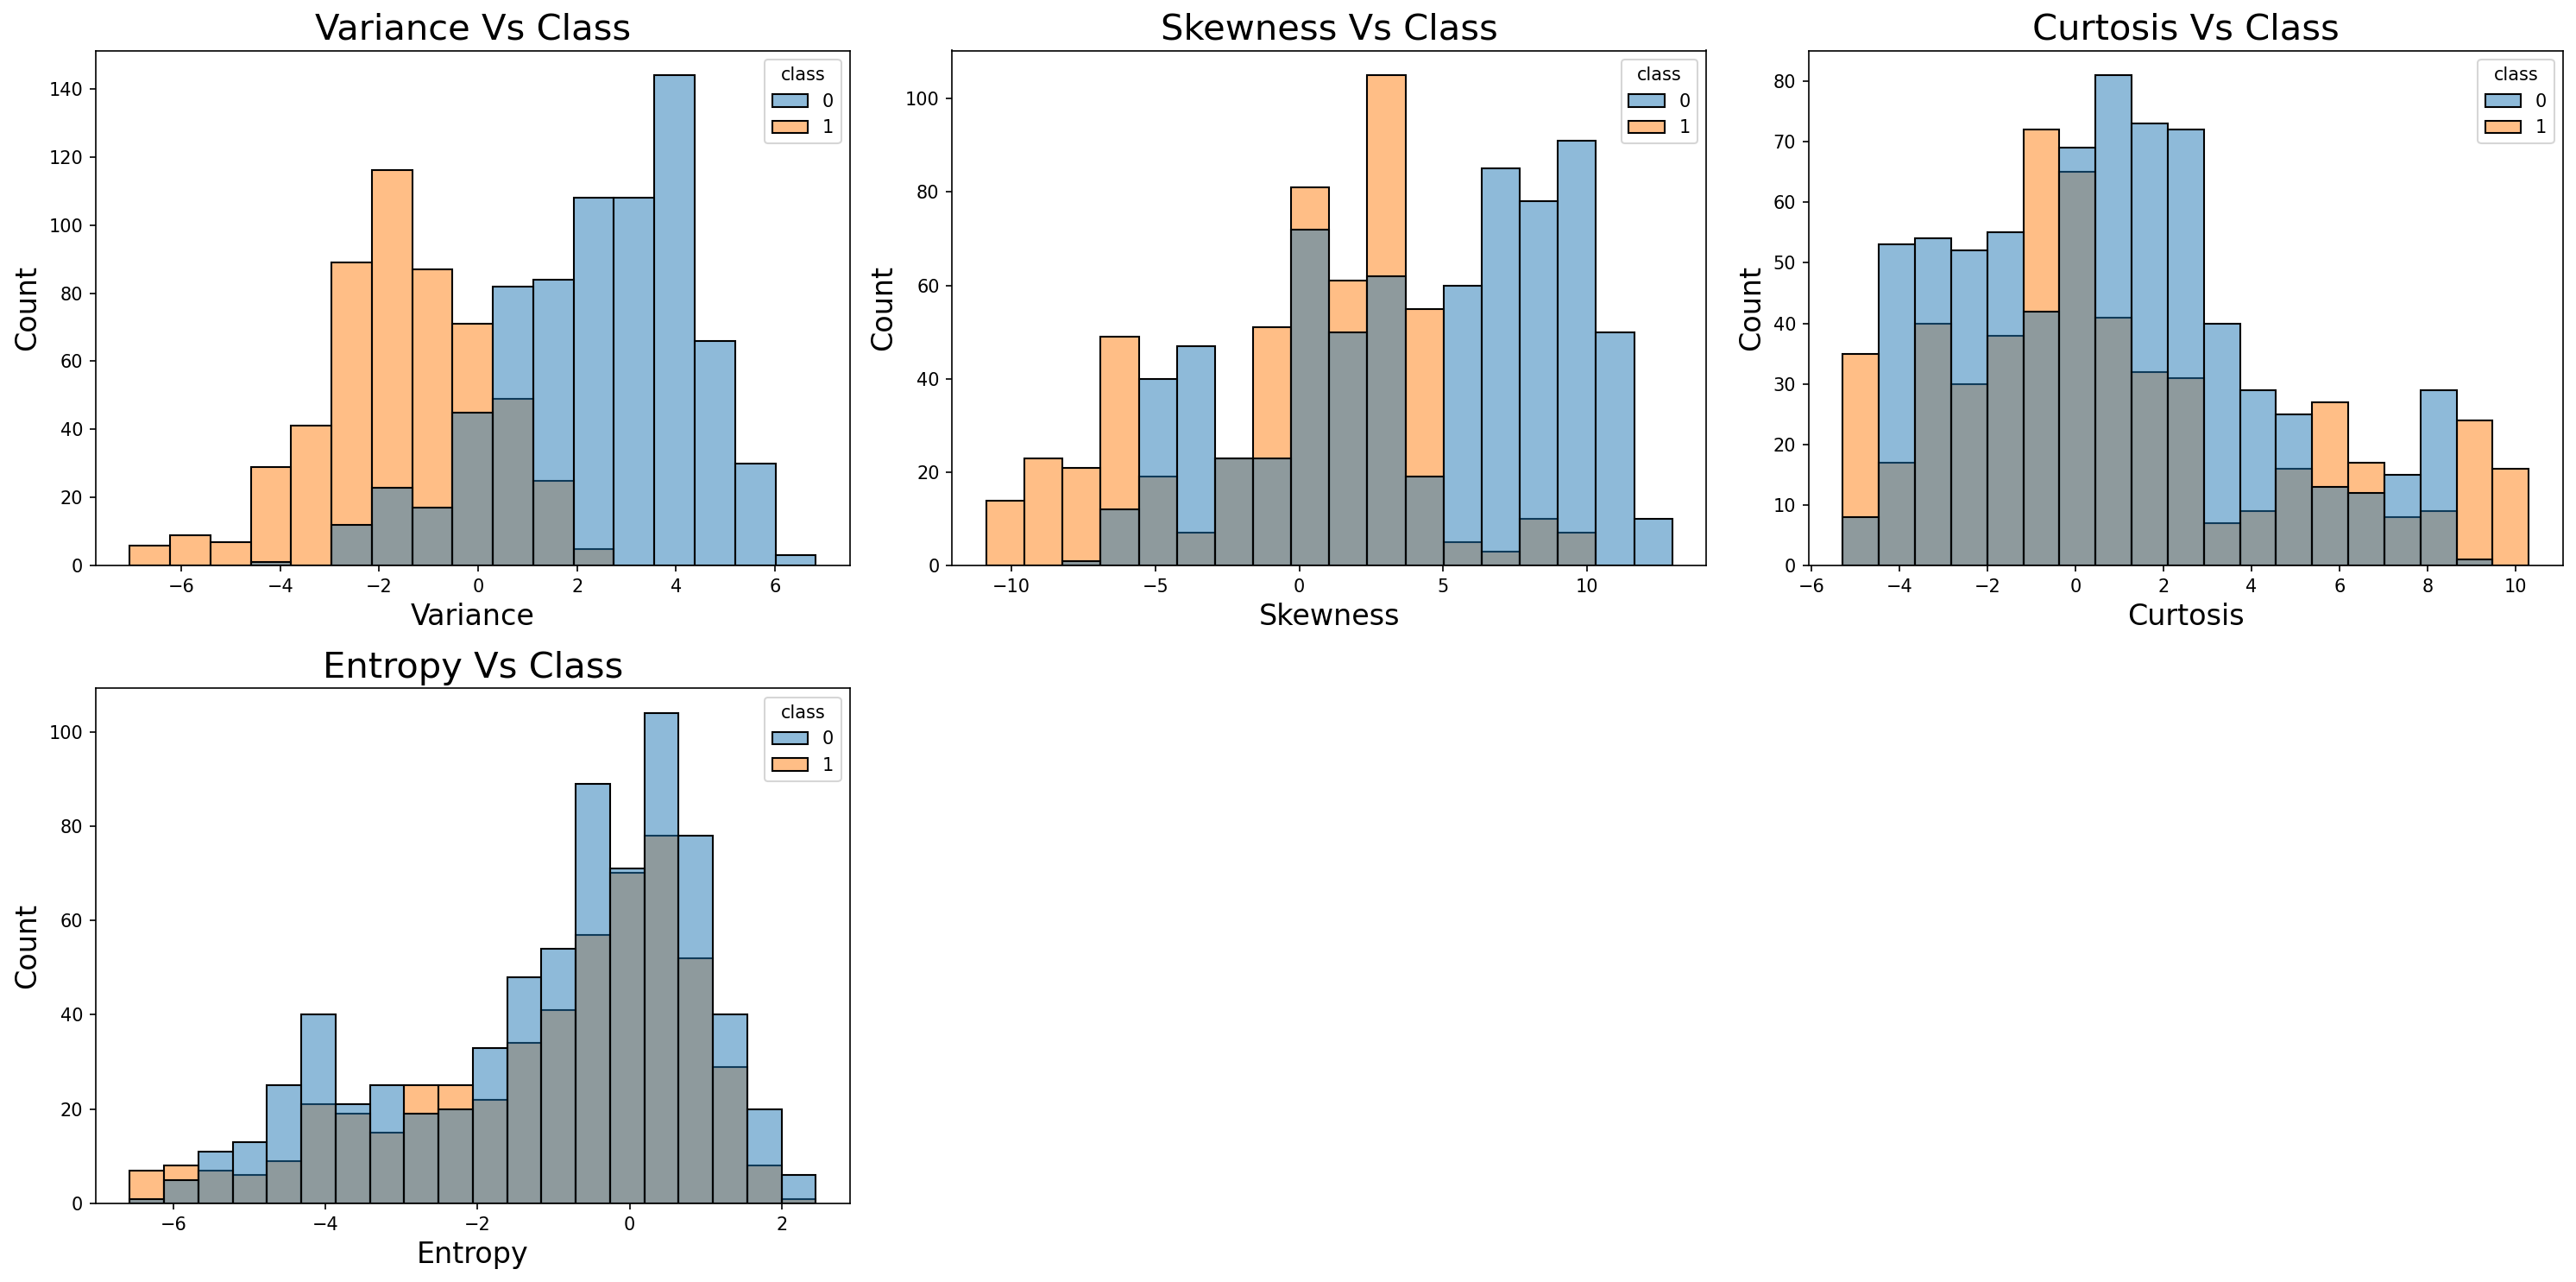

In [71]:
# features vs target
plt.figure(figsize = (20,10),dpi=150)  

# variance vs class
plt.subplot(2,3,1) 
sns.histplot(x = dfs.variance, hue = df['class']) 
plt.title('Variance Vs Class', fontsize = 20) 
plt.xlabel('Variance',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

# skewness vs class
plt.subplot(2,3,2) 
sns.histplot(x = dfs.skewness, hue = df['class']) 
plt.title('Skewness Vs Class', fontsize = 20) 
plt.xlabel('Skewness',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# curtosis vs class
plt.subplot(2,3,3) 
sns.histplot(x = dfs.curtosis, hue = df['class']) 
plt.title('Curtosis Vs Class', fontsize = 20) 
plt.xlabel('Curtosis',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# entropy vs class
plt.subplot(2,3,4) 
sns.histplot(x = dfs.entropy, hue = df['class']) 
plt.title('Entropy Vs Class', fontsize = 20) 
plt.xlabel('Entropy',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 


plt.tight_layout()
plt.show()


# Data Spliting

In [74]:
# split features and target data
X = dfs.drop('class',axis = 1)
y = dfs['class']

In [75]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Data Scaling

In [76]:
# scale features train and test data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [77]:
# make scaler pickle file
import pickle as pkl
pkl.dump(ss,open('bna_scaler.pkl','wb'))

# Model Building And Prediction

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [80]:
log_score=accuracy_score(y_test,y_pred)
log_score = round(log_score,3)
log_score

0.992

# KNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
params_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,20]}
greed_knn = GridSearchCV(knn,params_grid,cv = 10, n_jobs = 1)

In [82]:
greed_knn.fit(X_train,y_train)
y_pred = greed_knn.predict(X_test)
knn_score = accuracy_score(y_test,y_pred)
knn_score = round(knn_score,3)
knn_score

1.0

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
params_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,20]}
greed_dtc = GridSearchCV(dtc,params_grid,cv = 10, n_jobs = 1)

In [85]:
greed_dtc.fit(X_train,y_train)
y_pred = greed_dtc.predict(X_test)
dtc_score = accuracy_score(y_test,y_pred)
dtc_score = round(dtc_score,3)
dtc_score

0.988

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,20]}
greed_rfc = GridSearchCV(rfc,params_grid, cv = 10, n_jobs = 1)

In [87]:
greed_rfc.fit(X_train,y_train)
y_pred = greed_rfc.predict(X_test)
rfc_score = accuracy_score(y_test,y_pred)
rfc_score = round(rfc_score,3)
rfc_score

1.0

# XG Boost

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,verbosity = 0)
params_grid = {'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.9,0.5,1]}
greed_xgbc = GridSearchCV(xgb,params_grid,cv = 10, n_jobs = 1)

In [89]:
greed_xgbc.fit(X_train,y_train)
y_pred = greed_xgbc.predict(X_test)
xgbc_score = accuracy_score(y_test,y_pred)
xgbc_score = round(xgbc_score,3)
xgbc_score

0.992

In [90]:
performance=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "accuracy score":[log_score,knn_score,dtc_score,rfc_score,xgbc_score]})

In [91]:
print("Models and their evaluations")
print("\n")
performance.sort_values(["accuracy score"],ascending=False)

Models and their evaluations




,Model,accuracy score
1,KNN,1.000
3,Random Forest,1.000
0,Logistic regression,0.992
4,XGboost,0.992
2,Decision Tree,0.988


**Random Forest Classifier And KNN Classifier Both Are Performing Well With This Dataset, So We Can Take Any Of Them, We Are Taking Random Forest Classifier As Our Final Model**

# **Feature Importance By Random Forest Classifier**

In [107]:
imp_features = pd.DataFrame({'Importance' : greed_rfc.best_estimator_.feature_importances_},index = X.columns)
imp_features.Importance.sort_values(ascending=False) 

variance    0.554981
skewness    0.238495
curtosis    0.163955
entropy     0.042570
Name: Importance, dtype: float64

In [108]:
# make pickle file of model
pkl.dump(greed_rfc,open('bna_model.pkl','wb'))